# Dalex

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Previous Trained Model

In [2]:
# Load the saved Random Forest model
model_folder = "../../2_Modeling_Phase/Saved-Models/"
model_filename = "Farm-Flow_XGBoost.joblib"
model_path = model_folder + model_filename

model = joblib.load(model_path)

Load Train Dataset

In [3]:
df_train = pd.read_csv("../../0_Datasets/Farm-Flow/train.csv")

Load Test Dataset

In [4]:
df_test = pd.read_csv("../../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_train)

fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
0         -0.236304     -0.662387          -0.577140          -0.443123   
1         -0.672105     -0.457813          -0.577140          -0.443123   
2         -0.454205     -0.662387          -0.577140          -0.443123   
3          2.378496      2.406229           2.285759           2.444445   
4         -0.672105     -0.457813          -0.577140          -0.443123   
...             ...           ...                ...                ...   
47341     -0.454205     -0.457813          -0.577140          -0.443123   
47342     -0.454205     -0.662387          -0.577140          -0.443123   
47343      2.160596      1.997080           2.285759           2.444445   
47344      1.288996      1.383357           1.713179           0.711904   
47345     -0.672105     -0.457813          -0.577140          -0.443123   

       fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0             -0.277741         -0.268577          -0.273647      -1.394192   
1              0.490111          0.504662           0.498222       0.728588   
2             -0.277918         -0.268577          -0.273736      -1.394192   
3             -0.276874         -0.267504          -0.272675       0.728588   
4             -0.277823         -0.268460          -0.273629       0.728588   
...                 ...               ...                ...            ...   
47341         -0.276776         -0.267991          -0.272869      -0.332802   
47342         -0.277509         -0.268577          -0.273530      -1.394192   
47343         -0.276943         -0.267646          -0.272781       0.576960   
47344         -0.265775         -0.256330          -0.261520       0.728588   
47345         -0.277865         -0.268501          -0.273671       0.728588   

       fwd_header_size_tot  fwd_header_size_min  ...  flow_pkts_payload.max  \
0                -0.643844            -1.423582  ...              -0.562720   
1                -0.643844             0.278456  ...              -0.562720   
2                -0.724235            -1.423582  ...              -0.562720   
3                 2.129645            -0.147053  ...              -0.240860   
4                -0.684039            -0.147053  ...              -0.562720   
...                    ...                  ...  ...                    ...   
47341            -0.483062            -0.147053  ...              -0.562720   
47342            -0.724235            -1.423582  ...              -0.562720   
47343             1.928668            -0.147053  ...              -0.240860   
47344             2.330623             1.129475  ...              -0.250326   
47345            -0.684039            -0.147053  ...              -0.562720   

       flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  \
0                  -0.744570              -0.562649              -0.557806   
1                  -0.744570              -0.562649              -0.557806   
2                  -0.744570              -0.562649              -0.557806   
3                   1.678331              -0.105550              -0.268638   
4                  -0.744570              -0.562649              -0.557806   
...                      ...                    ...                    ...   
47341              -0.744570              -0.562649              -0.557806   
47342              -0.744570              -0.562649              -0.557806   
47343               1.678331              -0.054762              -0.267306   
47344               0.400251              -0.238680              -0.346375   
47345              -0.744570              -0.562649              -0.557806   

       fwd_subflow_pkts  bwd_subflow_pkts  fwd_subflow_bytes  \
0             -0.556874         -0.638986          -0.741186   
1             -0.556874         -0.419418          -0.741186   
2             -0.556874         -0.638986          -0.741186   
3              

In [6]:
display(df_test)

fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
0         -0.672105     -0.457813          -0.577140          -0.443123   
1         -0.672105     -0.457813          -0.577140          -0.443123   
2         -0.454205     -0.457813          -0.577140          -0.443123   
3          2.378496      2.406229           2.285759           2.444445   
4         -0.454205     -0.253238          -0.004560          -0.443123   
...             ...           ...                ...                ...   
15778      1.942696      2.201655           2.285759           2.444445   
15779      2.160596      2.201655           2.285759           2.444445   
15780     -0.236304     -0.662387          -0.577140          -0.443123   
15781     -0.454205     -0.662387          -0.577140          -0.443123   
15782     -0.236304     -0.662387          -0.577140          -0.443123   

       fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0             -0.276940         -0.267571          -0.272742       0.728588   
1             -0.277181         -0.267813          -0.272983       0.728588   
2             -0.276909         -0.268058          -0.272969      -0.332802   
3             -0.276907         -0.267537          -0.272708       0.728588   
4             -0.276892         -0.267522          -0.272693       0.728588   
...                 ...               ...                ...            ...   
15778         -0.277003         -0.267561          -0.272768       0.891878   
15779         -0.276991         -0.267622          -0.272793       0.728588   
15780         -0.277906         -0.268577          -0.273730      -1.394192   
15781         -0.277687         -0.268577          -0.273620      -1.394192   
15782         -0.277882         -0.268577          -0.273718      -1.394192   

       fwd_header_size_tot  fwd_header_size_min  ...  flow_pkts_payload.max  \
0                -0.684039            -0.147053  ...              -0.562720   
1                -0.684039            -0.147053  ...              -0.562720   
2                -0.483062            -0.147053  ...              -0.562720   
3                 2.129645            -0.147053  ...              -0.240860   
4                -0.241889             1.129475  ...              -0.477522   
...                    ...                  ...  ...                    ...   
15778             1.727690            -0.147053  ...              -0.240860   
15779             1.928668            -0.147053  ...              -0.240860   
15780            -0.643844            -1.423582  ...              -0.562720   
15781            -0.724235            -1.423582  ...              -0.562720   
15782            -0.643844            -1.423582  ...              -0.562720   

       flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  \
0                  -0.744570              -0.562649              -0.557806   
1                  -0.744570              -0.562649              -0.557806   
2                  -0.744570              -0.562649              -0.557806   
3                   1.678331              -0.105550              -0.268638   
4                  -0.635539              -0.408378              -0.455263   
...                      ...                    ...                    ...   
15778               1.678331              -0.054762              -0.267306   
15779               1.678331              -0.072901              -0.267431   
15780              -0.744570              -0.562649              -0.557806   
15781              -0.744570              -0.562649              -0.557806   
15782              -0.744570              -0.562649              -0.557806   

       fwd_subflow_pkts  bwd_subflow_pkts  fwd_subflow_bytes  \
0             -0.556874         -0.419418          -0.741186   
1             -0.556874         -0.419418          -0.741186   
2             -0.329944         -0.419418          -0.741186   
3              

-----
## Train and Test Datasets

Drop Multiclass Column

In [7]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [8]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [9]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [10]:
y = df_train["is_attack"].values

Split into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred)
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

Row to explain

In [17]:
idx = 0

---
## Dalex

### How it works
The DALEX package xrays any model and helps to explore and explain its behaviour, helps to understand how complex models are working. The main function explain() creates a wrapper around a predictive model. Wrapped models may then be explored and compared with a collection of local and global explainers.

### How does it apply
Helps us understand and compare other machine learning models, as well as, works as another fork of SHAP and LIME.

### Repository:
- https://github.com/ModelOriented/DALEX
- https://dalex.drwhy.ai/python-dalex-xgboost.html

### Paper:
- https://arxiv.org/abs/2012.14406

In [18]:
#pip install dalex -U

In [35]:
import dalex as dx

In [37]:
exp = dx.Explainer(model, X_subset_labeled, y_subset_labeled)

Preparation of a new explainer is initiated

  -> data              : 3550 rows 33 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3550 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001CEF6E88F40> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0034, mean = 0.694, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.773, mean = 0.00154, max = 0.939
  -> model_info        : package xgboost

A new explainer has been created!


In [38]:
exp.predict(X_subset_labeled)

array([0.99998736, 0.25773954, 0.04153043, ..., 0.9999763 , 0.24057037,
       0.13895261], dtype=float32)

Understand the feature importance

In [39]:
exp.model_parts().plot()

Understand how each feature impacted the prediction

In [23]:
exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 33/33 [00:01<00:00, 29.81it/s]


Another way of looking at LIME and understand the impact of each feature in the model prection

In [24]:
exp.predict_parts(X_test_labeled.iloc[33, :]).plot(min_max=[0,1])

In [25]:
pp = exp.predict_parts(X_test_labeled.iloc[[1]], type='shap_wrapper', shap_explainer_type="TreeExplainer")
type(pp)

dalex.wrappers._shap.object.ShapWrapper

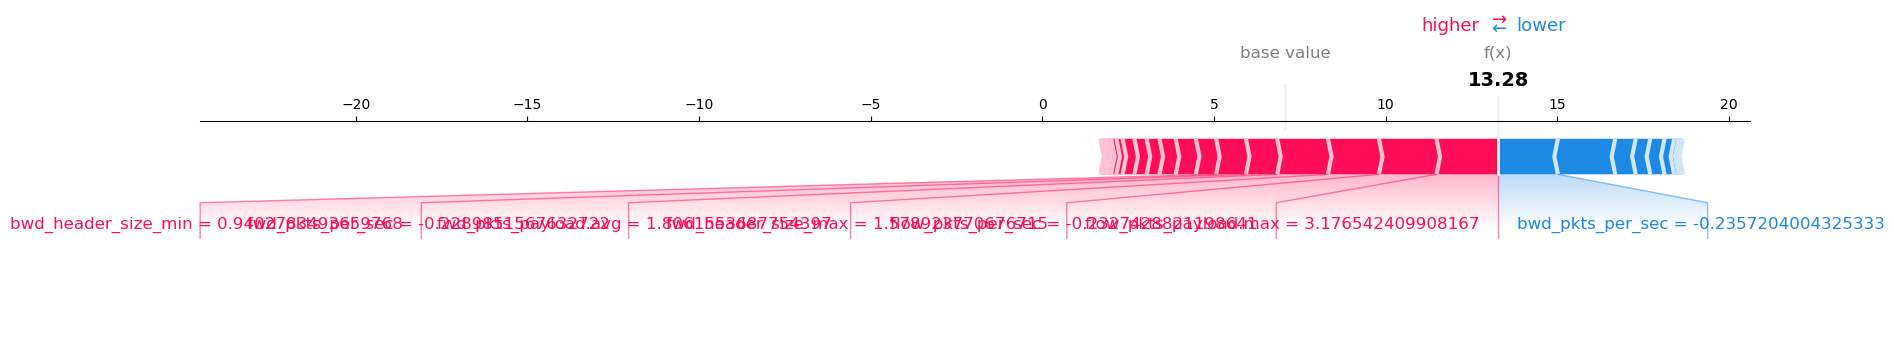

In [26]:
pp.plot()

In [27]:
#mp = exp.model_parts(type='shap_wrapper', shap_explainer_type="TreeExplainer")
#type(mp)

In [28]:
#mp.plot()

Compare Models

In [29]:
model_filename = "IoMT_AI_IDS_MLPClassifier.joblib"
model_path = model_folder + model_filename

model_mlp = joblib.load(model_path)

Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [30]:
exp = dx.Explainer(model, X_train, y_train)
exp_mlp = dx.Explainer(model_mlp, X_train, y_train)

Preparation of a new explainer is initiated

  -> data              : numpy.ndarray converted to pandas.DataFrame. Columns are set as string numbers.
  -> data              : 35509 rows 33 cols
  -> target variable   : 35509 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001CEF6E88F40> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00209, mean = 0.696, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.976, mean = 3.76e-06, max = 0.968
  -> model_info        : package xgboost

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : numpy.ndarray converted to pandas.DataF

X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names


In [31]:
mp = exp.model_performance("classification")
mp_mlp = exp_mlp.model_performance("classification")

In [32]:
mp.result

recall  precision        f1  accuracy       auc
XGBClassifier  0.927866   0.997389  0.961372  0.948126  0.979574

In [33]:
mp_mlp

In [34]:
mp.plot(mp_mlp)

Fairness module in dalex

- https://dalex.drwhy.ai/python-dalex-fairness.html (não aplicável)